In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import spacy
import re
import pandas as pd
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from datasets import load_dataset
from spacy.lang.en.examples import sentences 

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/lydia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/lydia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lydia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
# définir les stopwords
stop_words = set(stopwords.words('english'))
# ajout certains stopwords
custom_stopwords = []
stop_words.update(custom_stopwords)

In [22]:
def word_count(text):
    words = text.split()
    return len(words)


def frequent_word(text):
    # lower case
    doc = nlp(text.lower())  
    
    # filtrer stopwords et lemmatize le reste
    filtered_lemmatized_words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words]

    # compter le nombre de mots filtrés et lemmatizés
    word_counts = Counter(filtered_lemmatized_words)

    # le mot le plus fréquent et sa fréquence
    most_common_word, most_common_count = word_counts.most_common(1)[0]
    
    return most_common_word, most_common_count



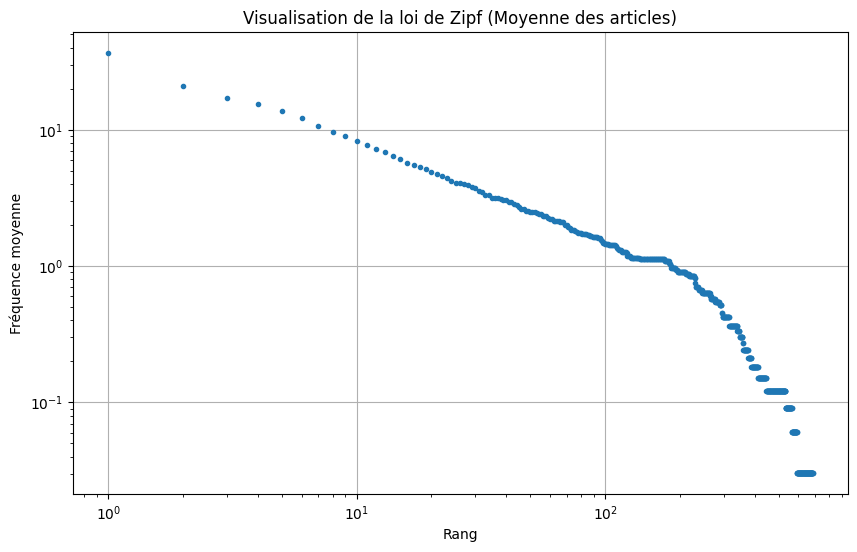

In [23]:
file_path = 'dataframe.csv'
df = pd.read_csv(file_path)

articles = df['content']


def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Calculer la fréquence des mots pour chaque article
all_frequencies = []

for article in articles:
    words = tokenize(article)
    word_counts = Counter(words)
    sorted_counts = sorted(word_counts.values(), reverse=True)
    all_frequencies.append(sorted_counts)

# Normaliser les longueurs des listes de fréquences
max_length = max(len(freqs) for freqs in all_frequencies)
normalized_frequencies = np.zeros((len(all_frequencies), max_length))

for i, freqs in enumerate(all_frequencies):
    normalized_frequencies[i, :len(freqs)] = freqs

# Calculer la moyenne des fréquences pour chaque rang
mean_frequencies = normalized_frequencies.mean(axis=0)

# Filtrer les zéros éventuels pour éviter des problèmes de visualisation
mean_frequencies = mean_frequencies[mean_frequencies > 0]

# Visualisation
ranks = range(1, len(mean_frequencies) + 1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, mean_frequencies, marker='.', linestyle='none')
plt.xlabel('Rang')
plt.ylabel('Fréquence moyenne')
plt.title('Visualisation de la loi de Zipf (Moyenne des articles)')
plt.grid(True)
plt.show()

In [28]:
with open('scraped_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


for item in data:
    item['title_word_count'] = word_count(item['title'])
    item['content_word_count'] = word_count(item['content'])
    word, count = frequent_word(item['content'])
    item['frequent_word'] = word
    item['frequency'] = count


df = pd.DataFrame(data)

df[:20]

,url,title,theme,content,topic,title_word_count,content_word_count,frequent_word,frequency
0,https://www.cbsnews.com/news/israel-hamas-war-...,"Palestinians mark 76th ""Nakba,"" as the raging ...",World,"Watch CBS News\nByImtiaz Tyab,Agnes Reau\nUpda...","[War, Hamas, Israel, Palestinians, Gaza Strip,...",17,421,cbs,6
1,https://www.cbsnews.com/news/college-professor...,College professor to stand trial in death of p...,Crime,"Watch CBS News\nMay 16, 2024 / 6:54 AM EDT/ CB...","[Hamas, Israel, Protests, Gaza Strip]",12,336,alnaji,8
2,https://www.cbsnews.com/news/gaza-pier-us-mili...,U.S. military finishes installing offshore pie...,World,Watch CBS News\nByEleanor Watson\nUpdated on: ...,"[War, Hamas, Israel, Joe Biden, Palestinians, ...",11,645,aid,13
3,https://www.cbsnews.com/news/israel-weapons-tr...,U.S. poised to send $1 billion in weapons to I...,Politics,"Watch CBS News\nByAlan He,Ellis Kim,Kristin Br...",[Israel],12,293,israel,6
4,https://www.cbsnews.com/news/new-miss-usa-crow...,New Miss USA Savannah Gankiewicz crowned after...,U.S.,"Watch CBS News\nByCaitlin O'Kane\nMay 16, 2024...","[Miss USA, Hawaii]",12,658,usa,20
5,https://www.cbsnews.com/news/maui-wildfires-ha...,They survived Maui's deadly wildfires. Now man...,U.S.,"Watch CBS News\nByLi Cohen\nMay 16, 2024 / 12:...","[Hawaii Wildfires, Maui, Lahaina, Hawaii]",15,667,fire,10
6,https://www.cbsnews.com/boston/news/hottest-su...,"Summer of 2023 was the hottest in 2,000 years ...",World,Watch CBS News\nByLi Cohen\nUpdated on: May 1...,"[Climate Change, Science]",17,811,temperature,13
7,https://www.cbsnews.com/boston/news/museum-of-...,"Museum of Science in Boston announces ""major r...",Local News,Watch CBS News\nByNeal Riley\nUpdated on: May...,[Boston],9,320,boston,8
8,https://www.cbsnews.com/boston/news/david-andr...,David Andrews reportedly agrees to contract ex...,Sports,Watch CBS News\nByMatt Geagan\nUpdated on: Ma...,[],13,337,season,10
9,https://www.cbsnews.com/news/ultra-processed-f...,Limit these ultra-processed foods for longer-t...,HealthWatch,Watch CBS News\nBySara Moniuszko\nEdited ByPau...,[],10,481,food,14


In [29]:
df.value_counts

<bound method DataFrame.value_counts of                                                   url  \
0   https://www.cbsnews.com/news/israel-hamas-war-...   
1   https://www.cbsnews.com/news/college-professor...   
2   https://www.cbsnews.com/news/gaza-pier-us-mili...   
3   https://www.cbsnews.com/news/israel-weapons-tr...   
4   https://www.cbsnews.com/news/new-miss-usa-crow...   
..                                                ...   
75  https://www.cbsnews.com/news/scottie-scheffler...   
76  https://www.cbsnews.com/news/apple-settlement-...   
77  https://www.cbsnews.com/news/relieve-stress-ou...   
78  https://www.cbsnews.com/losangeles/news/justic...   
79  https://www.cbsnews.com/colorado/news/boeing-b...   

                                                title        theme  \
0   Palestinians mark 76th "Nakba," as the raging ...        World   
1   College professor to stand trial in death of p...        Crime   
2   U.S. military finishes installing offshore pie...        Worl

In [25]:
df.to_csv('dataframe.csv', index=False)

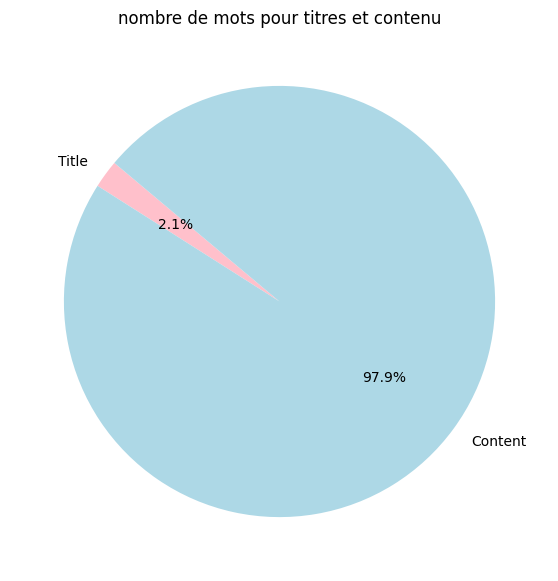

In [26]:
# counting average words of title and content
average_title_word_count = df['title_word_count'].mean()
average_content_word_count = df['content_word_count'].mean()

# Calculate total average words to get proportions for the pie chart
total_average_words = average_title_word_count + average_content_word_count
title_proportion = (average_title_word_count / total_average_words) * 100
content_proportion = (average_content_word_count / total_average_words) * 100

plt.figure(figsize=(7, 7))
plt.pie([title_proportion, content_proportion], labels=['Title', 'Content'], colors=['pink', 'lightblue'], autopct='%1.1f%%', startangle=140)
plt.title('nombre de mots pour titres et contenu')
plt.show()